# Assignment 3 by: Huy Doan (s3924345)


# Task 1: User-based Collaborative Filtering


In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
cd ml-1m

C:\Users\admin\Practical data science as3\ml-1m


In [3]:
names = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_df = pd.read_csv('ratings.dat', sep = '::', names = names)
ratings_df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_14028\3531997548.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_df = pd.read_csv('ratings.dat', sep = '::', names = names)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
names = ['user_id', 'gender', 'age', 'occupation', 'zip-code']
users_df = pd.read_csv('users.dat', sep = '::', names = names)
users_df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_14028\1964696686.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = pd.read_csv('users.dat', sep = '::', names = names)


,user_id,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
# Read the dataset
names = ['movie_id', 'title', 'genres']
movies_df = pd.read_csv('movies.dat', sep='::', names=names, encoding='ISO-8859-1')

# Split the genres into separate columns
genres_split = movies_df['genres'].str.get_dummies('|')

# Concatenate the split genres with the original DataFrame
movies_df = pd.concat([movies_df, genres_split], axis=1)

# Drop the original 'genres' column
movies_df = movies_df.drop('genres', axis=1)

movies_df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_14028\2828323664.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_csv('movies.dat', sep='::', names=names, encoding='ISO-8859-1')


,movie_id,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# This task is used for adding the unrated movie_id into the ratings_df, set other columns = 0

import pandas as pd

# Create a DataFrame with all unique 'movie_id' values from ratings_df
existing_movie_ids = pd.DataFrame(ratings_df['movie_id'].unique(), columns=['movie_id'])

# Create a DataFrame with all unique 'movie_id' values from movies_df
all_movie_ids = pd.DataFrame(movies_df['movie_id'].unique(), columns=['movie_id'])

# Identify movie_ids that are in movies_df but not in ratings_df
missing_movie_ids = all_movie_ids[~all_movie_ids['movie_id'].isin(existing_movie_ids['movie_id'])]

# Create a DataFrame with missing 'movie_id' values and 'user_id' set to None
missing_ratings = pd.DataFrame({
    'movie_id': missing_movie_ids['movie_id'],
    'user_id': 0, 
    'rating': 0    
})

# Combine missing_ratings with ratings_df
ratings_with_no = pd.concat([ratings_df, missing_ratings], ignore_index=True)

ratings_with_no = ratings_with_no[['user_id', 'movie_id', 'rating']]

# Display the resulting DataFrame
ratings_with_no


,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000381,0,3650,0
1000382,0,3750,0
1000383,0,3829,0
1000384,0,3856,0


In [7]:
ratings_with_no['user_id'].unique().shape[0]

6041

In [8]:
# This task is used for changing the movie_id to make it continously, not skipping any number
import pandas as pd

# Create a new DataFrame with 'movie_id' starting from 1 and equal to the row index + 1
fixed_movies_df = pd.DataFrame({'movie_id': range(1, len(movies_df) + 1)})

# Merge the fixed_movies_df DataFrame with  existing movies_df
fixed_movies_df = fixed_movies_df.merge(movies_df, left_index=True, right_index=True)



In [9]:
fixed_movies_df

,movie_id_x,movie_id_y,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,Toy Story (1995),0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,Jumanji (1995),0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3879,3948,Meet the Parents (2000),0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3880,3949,Requiem for a Dream (2000),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3881,3950,Tigerland (2000),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3882,3951,Two Family House (2000),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Create a mapping from movie_id_x to movie_id_y
ratings_fixed = ratings_with_no.copy()
movie_id_mapping = fixed_movies_df.set_index('movie_id_y')['movie_id_x']

# Update the 'movie_id' column in the ratings_with_no DataFrame using the mapping
ratings_with_no['movie_id'] = ratings_with_no['movie_id'].map(movie_id_mapping)


In [11]:
ratings_with_no

,user_id,movie_id,rating
0,1,1177,5
1,1,656,3
2,1,903,3
3,1,3340,4
4,1,2287,5
...,...,...,...
1000381,0,3582,0
1000382,0,3682,0
1000383,0,3760,0
1000384,0,3787,0


In [12]:
ratings_with_no['movie_id'].max()

3883

In [13]:
n_users = ratings_with_no['user_id'].unique().shape[0]
n_movies = ratings_with_no['movie_id'].unique().shape[0]

In [14]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(ratings_with_no, test_size=0.2)
train_df, test_df

(        user_id  movie_id  rating
 938018     5659      1198       1
 873957     5277      2092       2
 363385     2116      1899       4
 90019       593      1696       5
 40462       272      2758       1
 ...         ...       ...     ...
 87530       572      1275       1
 843307     5070      2861       2
 921222     5566      2118       3
 927441     5605      1451       4
 937116     5653      2328       5
 
 [800308 rows x 3 columns],
         user_id  movie_id  rating
 11620        90       149       3
 354022     2073       259       5
 819316     4922      1570       5
 836967     5030      3106       5
 531205     3280      3318       3
 ...         ...       ...     ...
 278127     1676      1076       5
 46574       311       524       4
 554895     3412      3459       4
 186030     1151      1449       4
 260754     1593       521       4
 
 [200078 rows x 3 columns])

In [15]:
n_users

6041

In [16]:
n_movies

3883

In [17]:
n_users = ratings_with_no.user_id.unique().shape[0]
n_movies = ratings_with_no.movie_id.unique().shape[0]

In [18]:
# Training Dataset
ratings = np.zeros((n_users, n_movies))
for row in train_df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
user_ratings_df = pd.DataFrame(ratings)

# Testing Dataset
test_ratings = np.zeros((n_users, n_movies))
for row in test_df.itertuples():
    test_ratings[row[1]-1, row[2]-1] = row[3]
test_user_ratings_df = pd.DataFrame(test_ratings)

user_ratings_df, test_user_ratings_df

(      0     1     2     3     4     5     6     7     8     9     ...  3873  \
 0      5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 4      0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0  ...   0.0   
 ...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
 6036   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 6037   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 6038   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 6039   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 6040   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
 
       3874  3875  3876  3877  3878  3

In [19]:
user_ratings_df

,0,1,2,3,4,5,6,7,8,9,...,3873,3874,3875,3876,3877,3878,3879,3880,3881,3882
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6039,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
ratings

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
userSimilarity = cosine_similarity(ratings, ratings)

data_ubs_fast = pd.DataFrame(userSimilarity)
data_ubs_fast.head()
data_pre = pd.DataFrame(index=range(0, n_users), columns=fixed_movies_df['title'])


In [22]:
data_pre

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Bamboozled (2000),Bootmen (2000),Digimon: The Movie (2000),Get Carter (2000),Get Carter (1971),Meet the Parents (2000),Requiem for a Dream (2000),Tigerland (2000),Two Family House (2000),"Contender, The (2000)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data_pre_with_title = data_pre.copy()
data_pre_with_title

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Bamboozled (2000),Bootmen (2000),Digimon: The Movie (2000),Get Carter (2000),Get Carter (1971),Meet the Parents (2000),Requiem for a Dream (2000),Tigerland (2000),Two Family House (2000),"Contender, The (2000)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

epsilon = 1e-9

# Define a function to calculate RMSE
def calculate_rmse(predicted, actual):
    predicted = np.array(predicted)
    actual = np.array(actual)

    # Get the indices where actual ratings are non-zero
    non_zero_indices = actual.nonzero()

    # Calculate RMSE only for the non-zero values
    rmse = np.sqrt(mean_squared_error(predicted[non_zero_indices], actual[non_zero_indices]))

    return rmse

# Define a function to generate movie suggestions for a target user
def generate_movie_suggestions(target_user_index, user_ratings_df, test_user_ratings_df, data_ubs_fast, k):
    actual_ratings = np.array(test_user_ratings_df.iloc[target_user_index])
    
    # Create an empty DataFrame to store the predicted ratings
    data_pre = pd.DataFrame(index=[target_user_index], columns=user_ratings_df.columns)

    for j in range(0, len(data_pre.columns)):
        if user_ratings_df.iloc[target_user_index][j] > 0:
            data_pre.at[target_user_index, j] = 0
        else:
            mask_rated_users = user_ratings_df[j] > 1
            top_neighbours = data_ubs_fast.loc[mask_rated_users, target_user_index].sort_values(ascending=False)[1:k+1].index
            top_neighbours_sim = data_ubs_fast.loc[mask_rated_users, target_user_index].sort_values(ascending=False)[1:k+1].values
            neighbours_ratings = user_ratings_df.iloc[top_neighbours, j]

            predicted_rating = sum(neighbours_ratings * top_neighbours_sim) / (sum(top_neighbours_sim) + epsilon)

            # Check if the user has already rated the movie in user_ratings_df
            if user_ratings_df.iloc[target_user_index][j] > 0:
                predicted_rating = 0

            data_pre.at[target_user_index, j] = predicted_rating

    return data_pre

# Assuming you have ratings_with_no DataFrame
# Step 1: Filter rows with positive ratings
filtered_ratings = ratings_with_no[ratings_with_no['rating'] > 0]

# Step 2: Group by user_id and count occurrences
user_counts = filtered_ratings['user_id'].value_counts()

# Step 3: Select 5 user_id values with more than 100 occurrences
selected_user_ids = user_counts.index
selected_user_ids = random.sample(selected_user_ids.tolist(), 1)  # Select 5 random users

# Step 4: Use selected_user_ids as target_user_indices
target_user_indices = np.array(selected_user_ids, dtype=int)

k_values = [15, 21, 25, 31, 35]

# Iterate over target users and k values, calculate RMSE, and print the results
for k in k_values:
    print(f"For k={k}:")
    for target_user_index in target_user_indices:
        # Generate movie suggestions for the target user
        data_pre = generate_movie_suggestions(target_user_index, user_ratings_df, test_user_ratings_df, data_ubs_fast, k)
        
        actual_ratings = np.array(test_user_ratings_df.iloc[target_user_index])
        rmse = calculate_rmse(data_pre.loc[target_user_index].values, actual_ratings)
        
        print(f"  User {target_user_index} - RMSE: {rmse:.4f}")


For k=15:
  User 985 - RMSE: 1.3321
For k=21:
  User 985 - RMSE: 1.3020
For k=25:
  User 985 - RMSE: 1.2973
For k=31:
  User 985 - RMSE: 1.2888
For k=35:
  User 985 - RMSE: 1.2774


In [25]:
suggestions = generate_movie_suggestions(target_user_indices[0], user_ratings_df, test_user_ratings_df, data_ubs_fast, k)
suggestions

,0,1,2,3,4,5,6,7,8,9,...,3873,3874,3875,3876,3877,3878,3879,3880,3881,3882
985,4.203625,3.227982,3.263226,2.872243,3.167903,4.114244,3.476418,3.134394,2.964786,3.447461,...,0,2.407968,3.149049,2.933983,3.53619,0,0,0,0,3.751765


In [26]:
suggestions.columns = data_pre_with_title.columns
suggestions

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Bamboozled (2000),Bootmen (2000),Digimon: The Movie (2000),Get Carter (2000),Get Carter (1971),Meet the Parents (2000),Requiem for a Dream (2000),Tigerland (2000),Two Family House (2000),"Contender, The (2000)"
985,4.203625,3.227982,3.263226,2.872243,3.167903,4.114244,3.476418,3.134394,2.964786,3.447461,...,0,2.407968,3.149049,2.933983,3.53619,0,0,0,0,3.751765


In [27]:
data_pre.columns = data_pre_with_title.columns
# rename columns

In [28]:
data_pre

title,Toy Story (1995),Jumanji (1995),Grumpier Old Men (1995),Waiting to Exhale (1995),Father of the Bride Part II (1995),Heat (1995),Sabrina (1995),Tom and Huck (1995),Sudden Death (1995),GoldenEye (1995),...,Bamboozled (2000),Bootmen (2000),Digimon: The Movie (2000),Get Carter (2000),Get Carter (1971),Meet the Parents (2000),Requiem for a Dream (2000),Tigerland (2000),Two Family House (2000),"Contender, The (2000)"
985,4.203625,3.227982,3.263226,2.872243,3.167903,4.114244,3.476418,3.134394,2.964786,3.447461,...,0,2.407968,3.149049,2.933983,3.53619,0,0,0,0,3.751765


In [29]:
fixed_movies_df.rename(columns={'movie_id_x': 'movie_id'}, inplace=True)


In [30]:
merged_df = fixed_movies_df.merge(ratings_with_no, on='movie_id')

In [31]:
merged_df

,movie_id,movie_id_y,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating
0,1,1,Toy Story (1995),0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,5
1,1,1,Toy Story (1995),0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,6,4
2,1,1,Toy Story (1995),0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,8,4
3,1,1,Toy Story (1995),0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,9,5
4,1,1,Toy Story (1995),0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,3883,3952,"Contender, The (2000)",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5812,4
1000382,3883,3952,"Contender, The (2000)",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5831,3
1000383,3883,3952,"Contender, The (2000)",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5837,4
1000384,3883,3952,"Contender, The (2000)",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5927,1


# Task 2: Item-based Collaborative filtering


In [32]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import pairwise_distances  
from sklearn.model_selection import train_test_split


# Split the data into a train and test set
train_data, test_data = train_test_split(merged_df, test_size=0.2, random_state=42)


active_movie_id = 400

# Create an item-user matrix with movie ratings for the training set
train_item_user_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating')
train_item_user_matrix = train_item_user_matrix.fillna(0)  

# Initialize a list to store RMSE values for different similarity metrics
rmse_values = []

In [33]:
# Define a function to calculate RMSE for predictions
from sklearn.metrics.pairwise import cosine_similarity

def calculate_rmse(predictions, actual):
    common_user_ids = predictions.index.intersection(actual.index)
    predictions = predictions[common_user_ids]
    actual = actual[common_user_ids]

    mse = mean_squared_error(predictions, actual)
    return np.sqrt(mse)

# Choose a single K value and a list of similarity metrics
k = 100  
similarity_metrics = ['cosine', 'correlation']  

for metric in similarity_metrics:
    # Calculate pairwise distances using the selected similarity metric
    item_distances = pairwise_distances(train_item_user_matrix, metric=metric)
    
    # Find the indices of the K-nearest neighbors for the active movie
    nearest_item_indices = np.argsort(item_distances[active_movie_id])[:k]
    
    # Predict ratings for the active movie by averaging the ratings of the K-nearest neighbors
    predicted_ratings = np.mean(train_item_user_matrix.iloc[nearest_item_indices], axis=0)
    
    # Calculate RMSE for the predictions using the test set
    test_item_user_matrix = test_data.pivot_table(index='movie_id', columns='user_id', values='rating')
    test_item_user_matrix = test_item_user_matrix.fillna(0)
    actual_ratings = test_item_user_matrix.loc[active_movie_id]
    rmse = calculate_rmse(predicted_ratings, actual_ratings)
    
    rmse_values.append((k, metric, rmse))

# Print the RMSE values for the chosen K and similarity metrics
for k, metric, rmse in rmse_values:
    print(f"K={k}, Metric={metric}: RMSE={rmse}")

K=100, Metric=cosine: RMSE=0.27911356479389327
K=100, Metric=correlation: RMSE=0.26370868846031


In [34]:
# Choose a single K value and a list of similarity metrics
k = 100  
similarity_metrics = ['cosine', 'correlation']

# Replace with the movie ID for which you want to predict ratings
active_movie_id = 1

rmse_values = []

for metric in similarity_metrics:
    # Calculate pairwise distances using the selected similarity metric
    item_distances = pairwise_distances(train_item_user_matrix, metric=metric)

    # Find the indices of the K-nearest neighbors for the active movie
    nearest_item_indices = np.argsort(item_distances[active_movie_id])[:k]

    # Predict ratings for the active movie by averaging the ratings of the K-nearest neighbors
    predicted_ratings = np.mean(train_item_user_matrix.iloc[nearest_item_indices], axis=0)

    # Print out the predicted ratings of different users on the active movie
    print(predicted_ratings)


movie_id
1       2.38
2       0.54
3       0.10
4       0.03
5       0.08
        ... 
3879    0.37
3880    0.16
3881    0.00
3882    0.00
3883    0.18
Length: 3815, dtype: float64
movie_id
1       2.31
2       0.51
3       0.06
4       0.03
5       0.05
        ... 
3879    0.37
3880    0.12
3881    0.00
3882    0.00
3883    0.18
Length: 3815, dtype: float64


In [35]:
merged_df

,movie_id,movie_id_y,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,rating
0,1,1,Toy Story (1995),0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,5
1,1,1,Toy Story (1995),0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,6,4
2,1,1,Toy Story (1995),0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,8,4
3,1,1,Toy Story (1995),0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,9,5
4,1,1,Toy Story (1995),0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,3883,3952,"Contender, The (2000)",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5812,4
1000382,3883,3952,"Contender, The (2000)",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5831,3
1000383,3883,3952,"Contender, The (2000)",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5837,4
1000384,3883,3952,"Contender, The (2000)",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,5927,1


# Task 3: A Better Recommender System

## Task 3.1

In [36]:
user_counts = ratings_with_no['user_id'].value_counts()

valid_user_ids = user_counts[user_counts > 100].index

selected_user_ids = np.random.choice(valid_user_ids, size=5, replace=False)

print("User to suggest: ", selected_user_ids)

User to suggest:  [3250  117 5769 1681 5709]


In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import average_precision_score, ndcg_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Define the top_n value for recommendations
top_n = 30

merged_data = ratings_with_no.merge(movies_df, on='movie_id', how='left').merge(users_df, on='user_id', how='left')

# Function to recommend movies for a user based on age and gender
def recommend_movies_for_user(user_id, user_age, user_gender, top_n=30):
    user_ratings = merged_data[merged_data['user_id'] == user_id]

    # Collaborative Filtering
    sorted_movies = user_ratings.sort_values(by='rating', ascending=False)
    top_movies_cf = sorted_movies.head(top_n)

    # Content-Based Filtering
    recommended_movies_cb = merged_data[(merged_data['age'] == user_age) & (merged_data['gender'] == user_gender)]
    recommended_movies_cb = recommended_movies_cb.head(top_n)

    return top_movies_cf, recommended_movies_cb

def evaluate_user(user_id, recommended_movies_cf, recommended_movies_cb, num_movies):
    # Combine recommendations from both CF and CB
    combined_recommendations = pd.concat([recommended_movies_cf, recommended_movies_cb]).drop_duplicates()

    user_ratings_in_ratings_with_no = merged_data[merged_data['user_id'] == user_id]
    user_movies = user_ratings_in_ratings_with_no['movie_id'].values

    # Ensure y_true has the correct size (equal to num_movies)
    y_true = np.zeros(num_movies)
    
    # Filter out invalid movie indices
    valid_user_movies = user_movies[user_movies < num_movies]
    
    if valid_user_movies.size > 0:
        y_true[valid_user_movies] = 1

    recommended_indices = combined_recommendations['movie_id'].values
    y_score = np.zeros(num_movies)
    y_score[recommended_indices] = 1

    ap = average_precision_score(y_true, y_score)

    y_true = y_true.reshape(1, -1)
    y_score = y_score.reshape(1, -1)
    ndcg = ndcg_score(y_true, y_score)

    return ap, ndcg

# List of selected user IDs for evaluation

# Recommend movies and evaluate for each selected user
aps = []
ndcgs = []

for user_id in selected_user_ids:
    user_info = merged_data[merged_data['user_id'] == user_id]
    user_age = user_info['age'].values[0]
    user_gender = user_info['gender'].values[0]
    
    recommended_movies_cf, recommended_movies_cb = recommend_movies_for_user(user_id, user_age, user_gender, top_n)
    ap, ndcg = evaluate_user(user_id, recommended_movies_cf, recommended_movies_cb, len(movies_df))
    
    aps.append(ap)
    ndcgs.append(ndcg)
    
    print(f"Recommended movies for user {user_id} (Collaborative Filtering):")
    print(recommended_movies_cf[["movie_id", "title"]])

    print(f"Recommended movies for user {user_id} (Content-Based Filtering):")
    print(recommended_movies_cb[["movie_id", "title"]])

# Calculate the average AP and NDCG across all selected users
average_ap = np.mean(aps)
average_ndcg = np.mean(ndcgs)

print("Average Precision (AP):", average_ap)
print("Normalized Discounted Cumulative Gain (NDCG):", average_ndcg)


Recommended movies for user 3250 (Collaborative Filtering):
        movie_id                                              title
525997       100                                   City Hall (1996)
526007      1684                               Mrs. Dalloway (1997)
526025       320                                      Suture (1993)
525956      1600                             She's So Lovely (1997)
525969      2615                          My Science Project (1985)
526021      1855                         Krippendorf's Tribe (1998)
525950      1576                                                NaN
526019      2655       Howling II: Your Sister Is a Werewolf (1985)
526017      2503                            Apple, The (Sib) (1998)
526043       524                                        Rudy (1993)
526042        50                         Usual Suspects, The (1995)
525940       590                          Dances with Wolves (1990)
525989      2261                            One Crazy Su

Recommended movies for user 1681 (Collaborative Filtering):
        movie_id                                              title
280244      2919                  Year of Living Dangerously (1982)
280335      2723                                 Mystery Men (1999)
280295      1177                             Enchanted April (1991)
280296      1179                               Grifters, The (1990)
280297      1180                                Hear My Song (1991)
280298      1182                                                NaN
280300      2106                                  Swing Kids (1993)
280301      1354                          Breaking the Waves (1996)
280245      1233                        Boat, The (Das Boot) (1981)
280305       848                         Spitfire Grill, The (1996)
280306      2125              Ever After: A Cinderella Story (1998)
280307      2126                                  Snake Eyes (1998)
280310       110                                  Braveh

In [38]:
# Calculate the average AP and NDCG across all users
average_ap = np.mean(aps)
average_ndcg = np.mean(ndcgs)

print("Average Precision (AP):", average_ap)
print("Normalized Discounted Cumulative Gain (NDCG):", average_ndcg)

Average Precision (AP): 0.17948313248207887
Normalized Discounted Cumulative Gain (NDCG): 0.7112621174103371


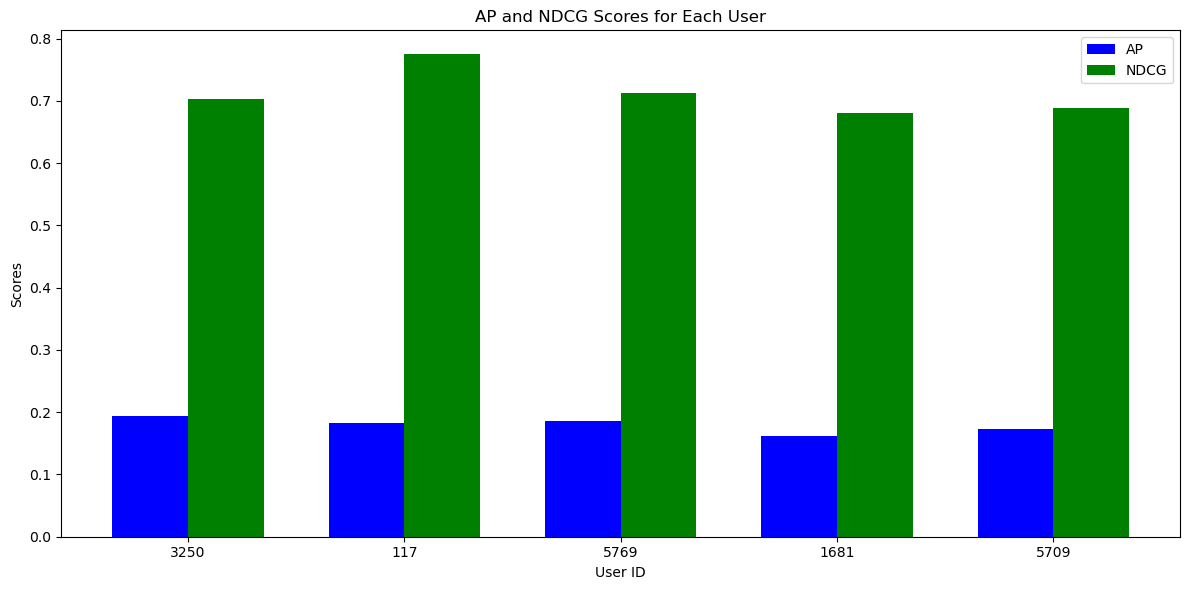

Average Precision (AP): 0.17948313248207887
Normalized Discounted Cumulative Gain (NDCG): 0.7112621174103371


In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the APs and NDCGs and stored them in the `aps` and `ndcgs` lists

# Create a combined bar chart for AP and NDCG
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

user_ids = np.arange(len(selected_user_ids))
bar1 = ax.bar(user_ids - width/2, aps, width, label='AP', color='blue')
bar2 = ax.bar(user_ids + width/2, ndcgs, width, label='NDCG', color='green')

ax.set_xlabel('User ID')
ax.set_ylabel('Scores')
ax.set_title('AP and NDCG Scores for Each User')
ax.set_xticks(user_ids)
ax.set_xticklabels(selected_user_ids)
ax.legend()

plt.tight_layout()
plt.show()

# Calculate the average AP and NDCG across all users
average_ap = np.mean(aps)
average_ndcg = np.mean(ndcgs)

print("Average Precision (AP):", average_ap)
print("Normalized Discounted Cumulative Gain (NDCG):", average_ndcg)


In [40]:
ratings = np.zeros((n_users, n_movies))
ratingsNum = np.zeros((n_users, n_movies))


for row in ratings_with_no.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
    ratingsNum[row[1]-1, row[2]-1] = 1
    
print(ratings)
print(ratingsNum)


moviesRateNum = ratingsNum.sum(axis=0)
moviesRateSum = ratings.sum(axis=0)

print(moviesRateNum)
print(moviesRateSum)


moviesRateAvg = moviesRateSum / moviesRateNum
print(moviesRateAvg)

[[5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2077.  701.  478. ...   54.   40.  388.]
[8613. 2244. 1442. ...  198.  156. 1467.]
[4.14684641 3.20114123 3.0167364  ... 3.66666667 3.9        3.78092784]


In [41]:
top_n = 30
ap_scores = {}
ndcg_scores = {}
from sklearn.metrics import average_precision_score, ndcg_score


for selected_user_id in selected_user_ids:
    activeUser = selected_user_id
    mask_activeUser = ratings[activeUser, :] > 0
    moviesRateAvgCurrent = moviesRateAvg.copy()
    moviesRateAvgCurrent[mask_activeUser] = 0
    moviesSortInd = moviesRateAvgCurrent.argsort()

    print('\t\tResults for User ' + str(activeUser))
    print('MovieID' + '\t\t\t\t Title')
    print(fixed_movies_df['title'][moviesSortInd[list(range(len(moviesSortInd) - 1, len(moviesSortInd) - top_n - 1, -1))]])
    
    top_movies = fixed_movies_df['title'][moviesSortInd[-top_n:][::-1]].values

   
    actual_ratings = mask_activeUser.astype(float) 

    # Create a list of recommended movie indices
    recommended_movie_indices = [moviesSortInd[i] for i in range(len(moviesSortInd) - 1, len(moviesSortInd) - top_n - 1, -1)]

    # Create a list of binary relevance for recommended movies
    relevance = [1 if i in recommended_movie_indices else 0 for i in range(len(fixed_movies_df))]

    # Calculate AP for this user
    ap = average_precision_score(actual_ratings, relevance)
    ap_scores[activeUser] = ap

    # Calculate NDCG for this user
    ndcg = ndcg_score([actual_ratings], [relevance])
    ndcg_scores[activeUser] = ndcg

    

# Calculate the mean AP and NDCG scores for all users
mean_ap = np.mean(list(ap_scores.values()))
mean_ndcg = np.mean(list(ndcg_scores.values()))

print("Mean AP:", mean_ap)
print("Mean NDCG:", mean_ndcg)

		Results for User 3250
MovieID				 Title
977             Schlafes Bruder (Brother of Sleep) (1995)
3103                              Ulysses (Ulisse) (1954)
3313                               Song of Freedom (1936)
3211                                     Baby, The (1973)
3164                                 Smashing Time (1967)
777                    Gate of Heavenly Peace, The (1995)
1762                              Follow the Bitch (1998)
3538                             One Little Indian (1973)
3587                                         Lured (1947)
3811                             Bittersweet Motel (2000)
3176                  I Am Cuba (Soy Cuba/Ya Kuba) (1964)
52                                        Lamerica (1994)
2434                              Apple, The (Sib) (1998)
2836                                       Sanjuro (1962)
1950    Seven Samurai (The Magnificent Seven) (Shichin...
315                      Shawshank Redemption, The (1994)
735                           

In [42]:
from sklearn.metrics import average_precision_score, ndcg_score
import numpy as np
k = 31

# Define a function to get top k recommendations for a user
def get_recommendations(user_index):
    recommendations = []

    for j in range(0, len(fixed_movies_df['title'])):
        if user_ratings_df.iloc[user_index][j] > 0:
            continue

        mask_rated_users = user_ratings_df[j] > 1
        top_neighbours = data_ubs_fast.loc[mask_rated_users, user_index].sort_values(ascending=False)[1:k+1].index
        top_neighbours_sim = data_ubs_fast.loc[mask_rated_users, user_index].sort_values(ascending=False)[1:k+1].values
        neighbours_ratings = user_ratings_df.iloc[top_neighbours, j]

        predicted_rating = sum(neighbours_ratings * top_neighbours_sim) / (sum(top_neighbours_sim) + epsilon)

        recommendations.append((fixed_movies_df['title'][j], predicted_rating))

    recommendations.sort(key=lambda x: x[1], reverse=True)
    return [movie for movie, _ in recommendations]

# Define a function to calculate AP and NDCG
def evaluate_recommendations(user_index, actual_ratings):
    recommended_movies = get_recommendations(user_index)

    recommended_indices = [fixed_movies_df[fixed_movies_df['title'] == movie].index[0] for movie in recommended_movies]

    # Calculate AP
    y_true = np.zeros(len(fixed_movies_df))
    y_true[actual_ratings.to_numpy().nonzero()[0]] = 1
    y_score = np.zeros(len(fixed_movies_df))
    y_score[recommended_indices] = 1
    ap = average_precision_score(y_true, y_score)

    # Calculate NDCG
    # Reshape the arrays to a 2D format expected by ndcg_score
    y_true = y_true.reshape(1, -1)
    y_score = y_score.reshape(1, -1)
    ndcg = ndcg_score(y_true, y_score)

    return ap, ndcg

# Iterate over selected user indices and calculate AP and NDCG for each user
for user_index in selected_user_ids:
    actual_ratings = user_ratings_df.iloc[user_index]
    ap, ndcg = evaluate_recommendations(user_index, actual_ratings)
    print(f"User {user_index}:")
    print(f"AP for k={k}: {ap}")
    print(f"NDCG for k={k}: {ndcg}")

User 3250:
AP for k=31: 0.013391707442698944
NDCG for k=31: 0.32946615554212516
User 117:
AP for k=31: 0.0468709760494463
NDCG for k=31: 0.47180345610412394
User 5769:
AP for k=31: 0.02910121040432655
NDCG for k=31: 0.4152440411528526
User 1681:
AP for k=31: 0.006180788050476436
NDCG for k=31: 0.2542718653185262
User 5709:
AP for k=31: 0.01673963430337368
NDCG for k=31: 0.3531991261709811


In [43]:
suggestions = generate_movie_suggestions(selected_user_ids[0], user_ratings_df, test_user_ratings_df, data_ubs_fast, k)
suggestions.columns = data_pre_with_title.columns
suggestions = suggestions.transpose()
suggestions.columns = ['rating']
top_rated_movies = suggestions.sort_values(by='rating', ascending=False).head(30)
user_id = selected_user_ids[0]
print(f"Top 30 movie suggestions for User ID {user_id}:")
print(top_rated_movies)



Top 30 movie suggestions for User ID 3250:
                                                      rating
title                                                       
Message to Love: The Isle of Wight Festival (1996)       5.0
Seven Chances (1925)                                     5.0
Window to Paris (1994)                                   5.0
Gate of Heavenly Peace, The (1995)                       5.0
Ballad of Narayama, The (Narayama Bushiko) (1958)        5.0
Callejón de los milagros, El (1995)                      5.0
Vampyros Lesbos (Las Vampiras) (1970)                    5.0
Angela (1995)                                            5.0
Skipped Parts (2000)                                     5.0
Smashing Time (1967)                                     5.0
Inheritors, The (Die Siebtelbauern) (1998)               5.0
Dangerous Game (1993)                                    5.0
Two Much (1996)                                          5.0
Zachariah (1971)                          

In [44]:
suggestions = generate_movie_suggestions(selected_user_ids[1], user_ratings_df, test_user_ratings_df, data_ubs_fast, k)
suggestions.columns = data_pre_with_title.columns
suggestions = suggestions.transpose()
suggestions.columns = ['rating']
top_rated_movies = suggestions.sort_values(by='rating', ascending=False).head(30)
user_id = selected_user_ids[1]
print(f"Top 30 movie suggestions for User ID {user_id}:")
print(top_rated_movies)


Top 30 movie suggestions for User ID 117:
                                                      rating
title                                                       
Window to Paris (1994)                                   5.0
Gate of Heavenly Peace, The (1995)                       5.0
Callejón de los milagros, El (1995)                      5.0
In God's Hands (1998)                                    5.0
Friend of the Deceased, A (1997)                         5.0
Late August, Early September (Fin août, début s...       5.0
Inheritors, The (Die Siebtelbauern) (1998)               5.0
Black Sunday (La Maschera Del Demonio) (1960)            5.0
Ballad of Narayama, The (Narayama Bushiko) (1958)        5.0
Skipped Parts (2000)                                     5.0
Angela (1995)                                            5.0
Smashing Time (1967)                                     5.0
Institute Benjamenta, or This Dream People Call...       5.0
JLG/JLG - autoportrait de décembre (1994)  

In [45]:
suggestions = generate_movie_suggestions(selected_user_ids[2], user_ratings_df, test_user_ratings_df, data_ubs_fast, k)
suggestions.columns = data_pre_with_title.columns
suggestions = suggestions.transpose()
suggestions.columns = ['rating']
top_rated_movies = suggestions.sort_values(by='rating', ascending=False).head(30)
user_id = selected_user_ids[2]
print(f"Top 30 movie suggestions for User ID {user_id}:")
print(top_rated_movies)

Top 30 movie suggestions for User ID 5769:
                                                      rating
title                                                       
Window to Paris (1994)                                   5.0
Gate of Heavenly Peace, The (1995)                       5.0
Late August, Early September (Fin août, début s...       5.0
Callejón de los milagros, El (1995)                      5.0
Ballad of Narayama, The (Narayama Bushiko) (1958)        5.0
Smashing Time (1967)                                     5.0
Dangerous Game (1993)                                    5.0
In God's Hands (1998)                                    5.0
Institute Benjamenta, or This Dream People Call...       5.0
JLG/JLG - autoportrait de décembre (1994)                5.0
Black Sunday (La Maschera Del Demonio) (1960)            5.0
Paralyzing Fear: The Story of Polio in America,...       5.0
Skipped Parts (2000)                                     5.0
Godfather, The (1972)                     

In [46]:
suggestions = generate_movie_suggestions(selected_user_ids[3], user_ratings_df, test_user_ratings_df, data_ubs_fast, k)
suggestions.columns = data_pre_with_title.columns
suggestions = suggestions.transpose()
suggestions.columns = ['rating']
top_rated_movies = suggestions.sort_values(by='rating', ascending=False).head(30)
user_id = selected_user_ids[3]
print(f"Top 30 movie suggestions for User ID {user_id}:")
print(top_rated_movies)

Top 30 movie suggestions for User ID 1681:
                                                      rating
title                                                       
Gate of Heavenly Peace, The (1995)                       5.0
Seven Chances (1925)                                     5.0
Window to Paris (1994)                                   5.0
Skipped Parts (2000)                                     5.0
In God's Hands (1998)                                    5.0
Ballad of Narayama, The (Narayama Bushiko) (1958)        5.0
Friend of the Deceased, A (1997)                         5.0
Dangerous Game (1993)                                    5.0
Smashing Time (1967)                                     5.0
Zachariah (1971)                                         5.0
JLG/JLG - autoportrait de décembre (1994)                5.0
Institute Benjamenta, or This Dream People Call...       5.0
Two Much (1996)                                          5.0
Angela (1995)                             

In [47]:
suggestions = generate_movie_suggestions(selected_user_ids[4], user_ratings_df, test_user_ratings_df, data_ubs_fast, k)
suggestions.columns = data_pre_with_title.columns
suggestions = suggestions.transpose()
suggestions.columns = ['rating']
top_rated_movies = suggestions.sort_values(by='rating', ascending=False).head(30)
user_id = selected_user_ids[4]
print(f"Top 30 movie suggestions for User ID {user_id}:")
print(top_rated_movies)

Top 30 movie suggestions for User ID 5709:
                                                      rating
title                                                       
Gate of Heavenly Peace, The (1995)                       5.0
Late August, Early September (Fin août, début s...       5.0
Inheritors, The (Die Siebtelbauern) (1998)               5.0
In God's Hands (1998)                                    5.0
Paralyzing Fear: The Story of Polio in America,...       5.0
Smashing Time (1967)                                     5.0
Ballad of Narayama, The (Narayama Bushiko) (1958)        5.0
JLG/JLG - autoportrait de décembre (1994)                5.0
Institute Benjamenta, or This Dream People Call...       5.0
Angela (1995)                                            5.0
Black Sunday (La Maschera Del Demonio) (1960)            5.0
Identification of a Woman (Identificazione di u...       5.0
Two Much (1996)                                          5.0
I Am Cuba (Soy Cuba/Ya Kuba) (1964)       